Librerías cargadas y configuración inicial realizada.
Dataset generado con 10000 filas y 16 columnas.

Primeras 5 filas del dataset:
   ID_Cliente  Edad  Ingreso_Anual  Frecuencia_Compra_Dias  \
0           1    56  286989.272599              118.214404   
1           2    69   57130.484160              157.182975   
2           3    46   59486.813250                     NaN   
3           4    32   42887.327373              115.266424   
4           5    60   38423.420639              176.895396   

   Valor_Promedio_Compra  Num_Productos_Comprados  Dias_Desde_Ultima_Compra  \
0             344.756435                      3.0                       284   
1             246.261949                      2.0                       290   
2             459.499415                      4.0                       342   
3             208.064370                      8.0                       286   
4             132.835237                     19.0                        48   

   Num_Interaccione

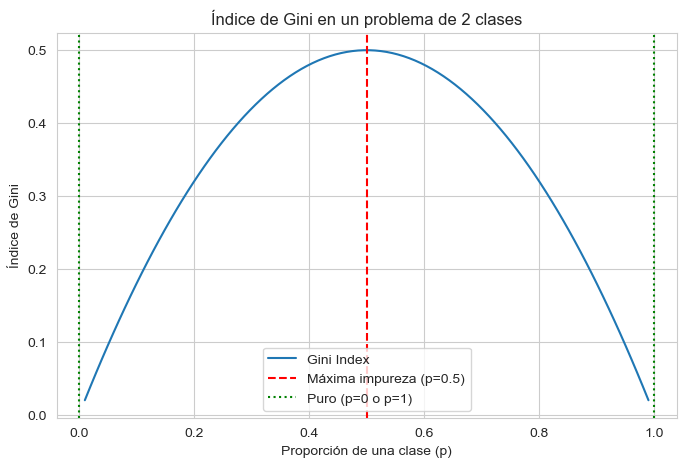

--- Ejemplo de Cálculo de Ganancia de Información ---
Entropía del Nodo Padre (6 'No', 4 'Sí'): 0.9710
Entropía del Nodo Hijo Izquierdo (5 'No', 0 'Sí'): 0.0000
Entropía del Nodo Hijo Derecho (1 'No', 4 'Sí'): 0.7219
Entropía ponderada de la división: 0.3610
Ganancia de Información por esta división: 0.6100

--- Visualización de Entropía vs. Proporción de Clase ---


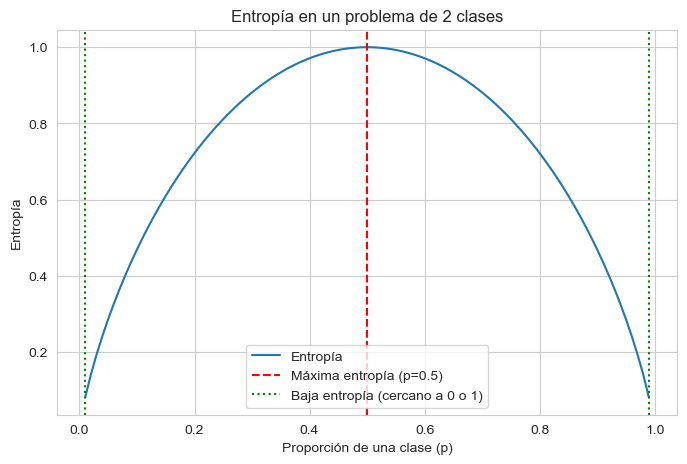

Entrenando Árbol de Decisión para Clasificación...
Modelo entrenado.

--- Evaluación del Árbol de Decisión para Clasificación ---
              precision    recall  f1-score   support

           0       0.41      0.02      0.04       600
           1       0.70      0.99      0.82      1400

    accuracy                           0.70      2000
   macro avg       0.55      0.50      0.43      2000
weighted avg       0.61      0.70      0.59      2000

Accuracy: 0.6970
ROC AUC: 0.6858
Visualización del Árbol de Decisión (Clasificación):
Entrenando Árbol de Decisión para Regresión...
Modelo entrenado.

--- Evaluación del Árbol de Decisión para Regresión ---
MAE (Mean Absolute Error): 41960.18
RMSE (Root Mean Squared Error): 118208.67
R^2 Score: 0.7375
Visualización del Árbol de Decisión (Regresión):
--- AdaBoost para Clasificación ---
Entrenando modelo AdaBoost...
Modelo AdaBoost entrenado.

--- Evaluación de AdaBoost ---
              precision    recall  f1-score   support

          

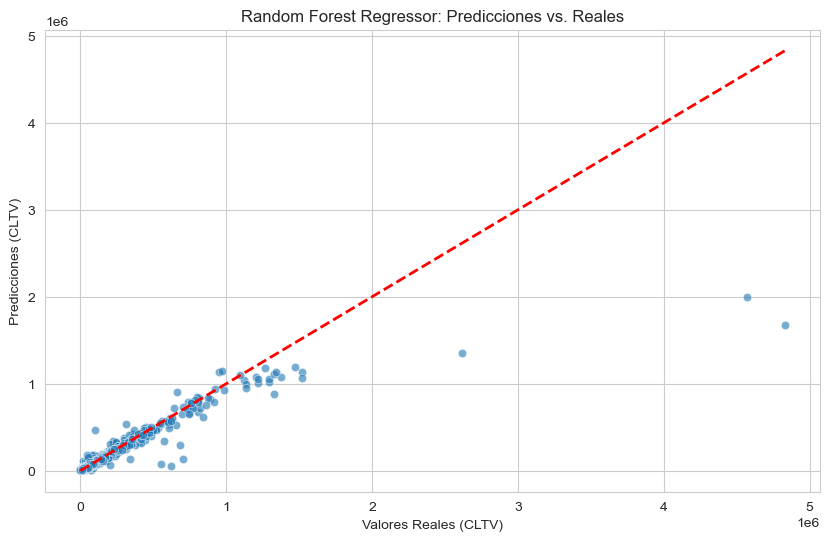


--- XGBoost para Regresión ---
Entrenando modelo XGBoost para Regresión...
Modelo XGBoost Regressor entrenado.

--- Evaluación de XGBoost para Regresión ---
MAE (Mean Absolute Error): 15933.58
RMSE (Root Mean Squared Error): 96916.34
R^2 Score: 0.8236


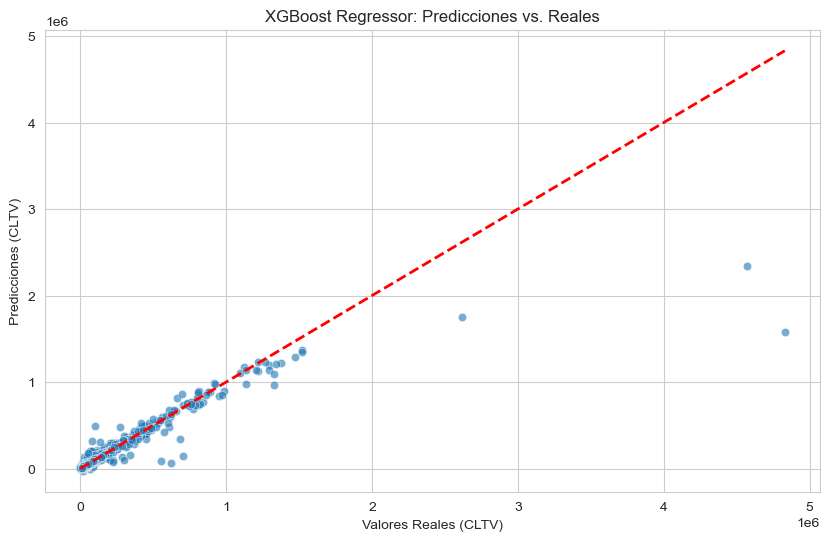


--- Optimización de Hiperparámetros para Random Forest Classifier ---
Ejecutando GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV finalizado.

Mejores hiperparámetros encontrados: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 300}
Mejor F1-Score en validación cruzada: 0.8235

--- Evaluación del Mejor Random Forest Classifier en el Conjunto de Prueba ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       600
           1       0.70      1.00      0.82      1400

    accuracy                           0.70      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.49      0.70      0.58      2000

Accuracy: 0.6990
ROC AUC: 0.6772


In [6]:
# %% [markdown]
# # Métodos Basados en Árboles de Decisión y Ensembles: Ejemplos Prácticos

#
# ---
#
# ## 1. Configuración Inicial y Generación de Datos Sintéticos
#
# Vamos a empezar configurando nuestro entorno e generando un conjunto de datos sintético. Para este cuaderno, simularemos un escenario donde queremos predecir el **Valor de Vida del Cliente (Customer Lifetime Value - CLTV)**, que es un problema de **regresión**, y si un cliente hará una **compra repetida** (problema de **clasificación**). Esto nos permitirá demostrar ambos tipos de árboles de decisión.
#
# Inyectaremos ruido, outliers y valores nulos para simular la complejidad de los datos del mundo real.

# %%
# Importación de librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy # Para calcular la entropía manualmente

# Para preprocesamiento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz # Para visualizar árboles
import graphviz # Para renderizar árboles

# Modelos de Machine Learning
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Métricas de evaluación para clasificación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Métricas de evaluación para regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignorar advertencias, útil para la presentación
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Semilla para reproducibilidad
np.random.seed(42)

print("Librerías cargadas y configuración inicial realizada.")

# %%
# --- Generación de Datos Sintéticos de Clientes ---
n_samples = 10000

# Variables numéricas
edad = np.random.randint(18, 70, n_samples)
ingreso_anual = np.random.normal(50000, 15000, n_samples) # Ingreso anual en USD
frecuencia_compra_dias = np.random.uniform(5, 180, n_samples) # Días entre compras
valor_promedio_compra = np.random.uniform(20, 500, n_samples) # Valor promedio de cada compra
num_productos_comprados = np.random.randint(1, 20, n_samples)
dias_desde_ultima_compra = np.random.randint(1, 365, n_samples)
num_interacciones_web = np.random.randint(0, 100, n_samples)

# Inyectar algunos outliers
ingreso_anual[np.random.choice(n_samples, 50, replace=False)] = np.random.uniform(150000, 500000, 50)
valor_promedio_compra[np.random.choice(n_samples, 50, replace=False)] = np.random.uniform(1000, 5000, 50)

# Variables categóricas
genero = np.random.choice(['Masculino', 'Femenino', 'No binario'], n_samples, p=[0.48, 0.48, 0.04])
region = np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_samples, p=[0.25, 0.25, 0.25, 0.25])
tipo_cliente = np.random.choice(['Regular', 'Premium', 'VIP'], n_samples, p=[0.7, 0.2, 0.1])
canal_adquisicion = np.random.choice(['Web', 'Referral', 'Social Media', 'Ads'], n_samples)
tiene_suscripcion = np.random.choice(['Si', 'No'], n_samples, p=[0.3, 0.7])

# Variable de fecha (simulando fecha de registro del cliente)
fecha_registro = pd.to_datetime('2020-01-01') + pd.to_timedelta(np.random.randint(0, 365*4, n_samples), unit='D') # Últimos 4 años

# Variables objetivo
# CLTV (Regresión): Depende de ingreso, frecuencia, valor promedio, num productos, tipo_cliente
cltv = (ingreso_anual * (365 / frecuencia_compra_dias) * valor_promedio_compra / 1000) + \
       (num_productos_comprados * 50) + \
       (tipo_cliente == 'Premium') * 5000 + \
       (tipo_cliente == 'VIP') * 15000 + \
       np.random.normal(0, 5000, n_samples) # Añadir ruido

# Asegurar que CLTV no sea negativo
cltv[cltv < 0] = 0

# Compra Repetida (Clasificación): Depende de dias_desde_ultima_compra, num_interacciones_web, tiene_suscripcion, tipo_cliente
# Menos probable si dias_desde_ultima_compra es alto, más probable si interacciones web altas, tiene suscripción, es Premium/VIP
compra_repetida_prob = (
    0.7 * (dias_desde_ultima_compra < 90) +
    0.1 * (num_interacciones_web > 50) +
    0.15 * (tiene_suscripcion == 'Si') +
    0.1 * (np.isin(tipo_cliente, ['Premium', 'VIP'])) + # Usar np.isin para Series
    np.random.uniform(-0.3, 0.3, n_samples)
)
compra_repetida = (compra_repetida_prob > 0.5).astype(int)

# Ajustar el desbalance para compra_repetida (ej. 70% Si, 30% No)
n_compra_actual = compra_repetida.sum()
n_no_compra_actual = n_samples - n_compra_actual
target_compra_ratio = 0.70 # Queremos 70% compra repetida
if n_compra_actual / n_samples < target_compra_ratio:
    num_to_flip = int(n_samples * target_compra_ratio) - n_compra_actual
    if num_to_flip > 0:
        indices_no_compra = np.where(compra_repetida == 0)[0]
        flip_indices = np.random.choice(indices_no_compra, num_to_flip, replace=False)
        compra_repetida[flip_indices] = 1
elif n_compra_actual / n_samples > target_compra_ratio:
    num_to_flip = n_compra_actual - int(n_samples * target_compra_ratio)
    if num_to_flip > 0:
        indices_compra = np.where(compra_repetida == 1)[0]
        flip_indices = np.random.choice(indices_compra, num_to_flip, replace=False)
        compra_repetida[flip_indices] = 0


# Crear DataFrame
data = pd.DataFrame({
    'ID_Cliente': range(1, n_samples + 1),
    'Edad': edad,
    'Ingreso_Anual': ingreso_anual,
    'Frecuencia_Compra_Dias': frecuencia_compra_dias,
    'Valor_Promedio_Compra': valor_promedio_compra,
    'Num_Productos_Comprados': num_productos_comprados,
    'Dias_Desde_Ultima_Compra': dias_desde_ultima_compra,
    'Num_Interacciones_Web': num_interacciones_web,
    'Genero': genero,
    'Region': region,
    'Tipo_Cliente': tipo_cliente,
    'Canal_Adquisicion': canal_adquisicion,
    'Tiene_Suscripcion': tiene_suscripcion,
    'Fecha_Registro': fecha_registro,
    'CLTV': cltv, # Objetivo de Regresión
    'Compra_Repetida': compra_repetida # Objetivo de Clasificación
})

# Inyectar algunos valores nulos para simular datos reales
for col in ['Ingreso_Anual', 'Frecuencia_Compra_Dias', 'Num_Productos_Comprados', 'Region', 'Tipo_Cliente', 'Num_Interacciones_Web']:
    data.loc[np.random.choice(n_samples, int(n_samples * 0.03), replace=False), col] = np.nan

print(f"Dataset generado con {data.shape[0]} filas y {data.shape[1]} columnas.")
print("\nPrimeras 5 filas del dataset:")
print(data.head())
print(f"\nDistribución de Compra_Repetida:\n{data['Compra_Repetida'].value_counts(normalize=True)}")
print(f"\nEstadísticas de CLTV:\n{data['CLTV'].describe()}")

# %% [markdown]
# ### Preprocesamiento de Datos
#
# Antes de entrenar cualquier modelo, es crucial preprocesar nuestros datos. Esto incluye manejar valores nulos, codificar variables categóricas y escalar variables numéricas. Usaremos `ColumnTransformer` y `Pipeline` para un flujo de trabajo robusto.

# %%
# Ingeniería de características simples (extraer año y mes de la fecha de registro)
data['Año_Registro'] = data['Fecha_Registro'].dt.year
data['Mes_Registro'] = data['Fecha_Registro'].dt.month

# Definir las columnas por tipo
numeric_features = [
    'Edad', 'Ingreso_Anual', 'Frecuencia_Compra_Dias', 'Valor_Promedio_Compra',
    'Num_Productos_Comprados', 'Dias_Desde_Ultima_Compra', 'Num_Interacciones_Web',
    'Año_Registro', 'Mes_Registro' # Nuevas características
]
categorical_features = [
    'Genero', 'Region', 'Tipo_Cliente', 'Canal_Adquisicion', 'Tiene_Suscripcion'
]

# Excluir ID_Cliente y las variables objetivo del preprocesamiento
X_base = data.drop(['ID_Cliente', 'CLTV', 'Compra_Repetida', 'Fecha_Registro'], axis=1)

# Asegurar que todas las columnas en X_base están en nuestras listas de features
current_features = numeric_features + categorical_features
missing_in_X_base = set(X_base.columns) - set(current_features)
if missing_in_X_base:
    print(f"Advertencia: Columnas en X_base no incluidas en preprocesamiento: {missing_in_X_base}")

# Pipeline para características numéricas: imputación con la mediana y escalado
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para características categóricas: imputación con la moda y OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar preprocesadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Descarta columnas no especificadas
)

print("Preprocesador configurado.")


#
# ## 2. Índice de Gini y Ganancia de Información (Ejemplos Teóricos y Prácticos)

def calculate_gini(labels):
    """Calcula el Índice de Gini para un conjunto de etiquetas."""
    if len(labels) == 0:
        return 0.0
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    gini = 1 - np.sum(probabilities**2)
    return gini

# Ejemplo de un nodo (problema de clasificación de Compra_Repetida)
print("--- Ejemplo de Cálculo de Gini ---")
# Nodo Padre: 10 clientes (6 No Compra, 4 Compra)
parent_labels = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]) # 0: No Compra, 1: Compra
gini_parent = calculate_gini(parent_labels)
print(f"Gini del Nodo Padre (6 'No', 4 'Sí'): {gini_parent:.4f}")

# Simulación de una división:
# Rama Izquierda: 5 clientes (5 No Compra, 0 Compra) -> Nodo puro
left_child_labels = np.array([0, 0, 0, 0, 0])
gini_left = calculate_gini(left_child_labels)
print(f"Gini del Nodo Hijo Izquierdo (5 'No', 0 'Sí'): {gini_left:.4f}")

# Rama Derecha: 5 clientes (1 No Compra, 4 Compra) -> Nodo más impuro
right_child_labels = np.array([0, 1, 1, 1, 1])
gini_right = calculate_gini(right_child_labels)
print(f"Gini del Nodo Hijo Derecho (1 'No', 4 'Sí'): {gini_right:.4f}")

# Cálculo del Gini ponderado de la división
weighted_gini = (len(left_child_labels) / len(parent_labels)) * gini_left + \
                (len(right_child_labels) / len(parent_labels)) * gini_right
print(f"Gini ponderado de la división: {weighted_gini:.4f}")

# Ganancia de Gini: Reducción de impureza
gini_gain = gini_parent - weighted_gini
print(f"Ganancia de Gini por esta división: {gini_gain:.4f}")

print("\n--- Visualización de Gini vs. Proporción de Clase ---")
proportions = np.linspace(0.01, 0.99, 100)
gini_values = [1 - (p**2 + (1-p)**2) for p in proportions]
plt.figure(figsize=(8, 5))
plt.plot(proportions, gini_values, label='Gini Index')
plt.xlabel('Proporción de una clase (p)')
plt.ylabel('Índice de Gini')
plt.title('Índice de Gini en un problema de 2 clases')
plt.axvline(x=0.5, color='r', linestyle='--', label='Máxima impureza (p=0.5)')
plt.axvline(x=0, color='g', linestyle=':', label='Puro (p=0 o p=1)')
plt.axvline(x=1, color='g', linestyle=':', label='')
plt.legend()
plt.grid(True)
plt.show()


# ### 2.2. Cálculo de Ganancia de Información (Basada en Entropía)

def calculate_entropy(labels):
    """Calcula la Entropía para un conjunto de etiquetas."""
    if len(labels) == 0:
        return 0.0
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    # entropy de scipy ya usa log base 2 por defecto
    ent = entropy(probabilities, base=2)
    return ent

print("--- Ejemplo de Cálculo de Ganancia de Información ---")
# Nodo Padre: 10 clientes (6 No Compra, 4 Compra)
parent_labels = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
entropy_parent = calculate_entropy(parent_labels)
print(f"Entropía del Nodo Padre (6 'No', 4 'Sí'): {entropy_parent:.4f}")

# Simulación de una división (misma que para Gini):
# Rama Izquierda: 5 clientes (5 No Compra, 0 Compra) -> Nodo puro
left_child_labels = np.array([0, 0, 0, 0, 0])
entropy_left = calculate_entropy(left_child_labels)
print(f"Entropía del Nodo Hijo Izquierdo (5 'No', 0 'Sí'): {entropy_left:.4f}")

# Rama Derecha: 5 clientes (1 No Compra, 4 Compra) -> Nodo más impuro
right_child_labels = np.array([0, 1, 1, 1, 1])
entropy_right = calculate_entropy(right_child_labels)
print(f"Entropía del Nodo Hijo Derecho (1 'No', 4 'Sí'): {entropy_right:.4f}")

# Cálculo de la Entropía ponderada de la división
weighted_entropy = (len(left_child_labels) / len(parent_labels)) * entropy_left + \
                   (len(right_child_labels) / len(parent_labels)) * entropy_right
print(f"Entropía ponderada de la división: {weighted_entropy:.4f}")

# Ganancia de Información
information_gain = entropy_parent - weighted_entropy
print(f"Ganancia de Información por esta división: {information_gain:.4f}")

print("\n--- Visualización de Entropía vs. Proporción de Clase ---")
proportions = np.linspace(0.01, 0.99, 100)
entropy_values = [- (p * np.log2(p) + (1-p) * np.log2(1-p)) for p in proportions]
plt.figure(figsize=(8, 5))
plt.plot(proportions, entropy_values, label='Entropía')
plt.xlabel('Proporción de una clase (p)')
plt.ylabel('Entropía')
plt.title('Entropía en un problema de 2 clases')
plt.axvline(x=0.5, color='r', linestyle='--', label='Máxima entropía (p=0.5)')
plt.axvline(x=0.01, color='g', linestyle=':', label='Baja entropía (cercano a 0 o 1)') # Mostrar un poco de margen para log(0)
plt.axvline(x=0.99, color='g', linestyle=':', label='')
plt.legend()
plt.grid(True)
plt.show()

# ## 3. Árboles de Decisión para Clasificación


# %%
# Separar características (X) y variable objetivo (y) para clasificación
y_clf = data['Compra_Repetida']

# Crear el pipeline de preprocesamiento y modelo para clasificación
# Se usa el preprocessor definido anteriormente
pipeline_dt_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')) # Usamos Gini aquí
])

# Dividir los datos para clasificación
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_base, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# Entrenar el modelo
print("Entrenando Árbol de Decisión para Clasificación...")
pipeline_dt_clf.fit(X_train_clf, y_train_clf)
print("Modelo entrenado.")

# Realizar predicciones
y_pred_clf = pipeline_dt_clf.predict(X_test_clf)

# Evaluar el modelo
print("\n--- Evaluación del Árbol de Decisión para Clasificación ---")
print(classification_report(y_test_clf, y_pred_clf))
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_clf, pipeline_dt_clf.predict_proba(X_test_clf)[:, 1]):.4f}")

# %% [markdown]
# ### Visualización de un Árbol de Decisión (Clasificación)
#
# Podemos visualizar la estructura del árbol para entender su lógica. Nota: Para árboles profundos, la visualización puede ser muy grande.

# %%
# Acceder al modelo DecisionTreeClassifier dentro del pipeline
decision_tree_model_clf = pipeline_dt_clf.named_steps['classifier']

# Obtener los nombres de las características después del preprocesamiento
# Esto puede ser un poco complicado con OneHotEncoder, así que creamos una lista de características procesadas
ohe = pipeline_dt_clf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
feature_names_processed = numeric_features + list(ohe.get_feature_names_out(categorical_features))

dot_data_clf = export_graphviz(
    decision_tree_model_clf,
    feature_names=feature_names_processed,
    class_names=['No Compra', 'Compra'],
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None,
    impurity=True
)
graph_clf = graphviz.Source(dot_data_clf)

print("Visualización del Árbol de Decisión (Clasificación):")
# Guardar o mostrar el gráfico. Para notebooks, graphviz.Source lo renderiza directamente.
graph_clf


# ## 4. Árboles de Decisión para Regresión


# %%
# Separar características (X) y variable objetivo (y) para regresión
y_reg = data['CLTV']

# Crear el pipeline de preprocesamiento y modelo para regresión
pipeline_dt_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5)) # max_depth para controlar complejidad
])

# Dividir los datos para regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_base, y_reg, test_size=0.2, random_state=42
)

# Entrenar el modelo
print("Entrenando Árbol de Decisión para Regresión...")
pipeline_dt_reg.fit(X_train_reg, y_train_reg)
print("Modelo entrenado.")

# Realizar predicciones
y_pred_reg = pipeline_dt_reg.predict(X_test_reg)

# Evaluar el modelo
print("\n--- Evaluación del Árbol de Decisión para Regresión ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.2f}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")


# ### Visualización de un Árbol de Decisión (Regresión)

decision_tree_model_reg = pipeline_dt_reg.named_steps['regressor']

dot_data_reg = export_graphviz(
    decision_tree_model_reg,
    feature_names=feature_names_processed, # Usamos los mismos nombres de características procesadas
    filled=True,
    rounded=True,
    special_characters=True,
    out_file=None,
    impurity=False, 
)
graph_reg = graphviz.Source(dot_data_reg)

print("Visualización del Árbol de Decisión (Regresión):")
graph_reg


# ## 5. Ensemble Learning para Clasificación

# ### 5.1. AdaBoost (Adaptive Boosting)

print("--- AdaBoost para Clasificación ---")

# Pipeline para AdaBoost
pipeline_adaboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), # Árboles débiles (stumps)
                                      n_estimators=100, # Número de estimadores (árboles)
                                      random_state=42,
                                      learning_rate=1.0))
])

# Entrenar el modelo AdaBoost
print("Entrenando modelo AdaBoost...")
pipeline_adaboost.fit(X_train_clf, y_train_clf)
print("Modelo AdaBoost entrenado.")

# Realizar predicciones
y_pred_adaboost = pipeline_adaboost.predict(X_test_clf)

# Evaluar el modelo
print("\n--- Evaluación de AdaBoost ---")
print(classification_report(y_test_clf, y_pred_adaboost))
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_adaboost):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_clf, pipeline_adaboost.predict_proba(X_test_clf)[:, 1]):.4f}")


# ### 5.2. Random Forest

print("\n--- Random Forest para Clasificación ---")

# Pipeline para Random Forest
pipeline_rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, # Número de árboles
                                          max_depth=10,    # Profundidad máxima de cada árbol
                                          random_state=42,
                                          n_jobs=-1)) # Usar todos los núcleos de la CPU
])

# Entrenar el modelo Random Forest
print("Entrenando modelo Random Forest para Clasificación...")
pipeline_rf_clf.fit(X_train_clf, y_train_clf)
print("Modelo Random Forest entrenado.")

# Realizar predicciones
y_pred_rf_clf = pipeline_rf_clf.predict(X_test_clf)

# Evaluar el modelo
print("\n--- Evaluación de Random Forest para Clasificación ---")
print(classification_report(y_test_clf, y_pred_rf_clf))
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_rf_clf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_clf, pipeline_rf_clf.predict_proba(X_test_clf)[:, 1]):.4f}")


# ### 5.3. XGBoost (Extreme Gradient Boosting)

print("\n--- XGBoost para Clasificación ---")

# Pipeline para XGBoost
pipeline_xgb_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(objective='binary:logistic', # Para clasificación binaria
                                 n_estimators=200,          # Número de árboles
                                 learning_rate=0.1,         # Tasa de aprendizaje
                                 use_label_encoder=False,   # Deprecation warning fix
                                 eval_metric='logloss',     # Métrica para evaluación
                                 random_state=42,
                                 n_jobs=-1))
])

# Entrenar el modelo XGBoost
print("Entrenando modelo XGBoost para Clasificación...")
pipeline_xgb_clf.fit(X_train_clf, y_train_clf)
print("Modelo XGBoost entrenado.")

# Realizar predicciones
y_pred_xgb_clf = pipeline_xgb_clf.predict(X_test_clf)

# Evaluar el modelo
print("\n--- Evaluación de XGBoost para Clasificación ---")
print(classification_report(y_test_clf, y_pred_xgb_clf))
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_xgb_clf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_clf, pipeline_xgb_clf.predict_proba(X_test_clf)[:, 1]):.4f}")


# ## 6. Ensemble Learning para Regresión

print("\n--- Random Forest para Regresión ---")

# Pipeline para Random Forest Regressor
pipeline_rf_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200,
                                        max_depth=10,
                                        random_state=42,
                                        n_jobs=-1))
])

# Entrenar el modelo Random Forest Regressor
print("Entrenando modelo Random Forest para Regresión...")
pipeline_rf_reg.fit(X_train_reg, y_train_reg)
print("Modelo Random Forest Regressor entrenado.")

# Realizar predicciones
y_pred_rf_reg = pipeline_rf_reg.predict(X_test_reg)

# Evaluar el modelo
print("\n--- Evaluación de Random Forest para Regresión ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test_reg, y_pred_rf_reg):.2f}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg)):.2f}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_rf_reg):.4f}")

# Visualización de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_rf_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (CLTV)')
plt.ylabel('Predicciones (CLTV)')
plt.title('Random Forest Regressor: Predicciones vs. Reales')
plt.show()


# ### 6.2. XGBoost Regressor - también es altamente efectivo para problemas de regresión.

print("\n--- XGBoost para Regresión ---")

# Pipeline para XGBoost Regressor
pipeline_xgb_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', # Para regresión (minimiza MSE)
                                n_estimators=200,
                                learning_rate=0.1,
                                random_state=42,
                                n_jobs=-1))
])

# Entrenar el modelo XGBoost Regressor
print("Entrenando modelo XGBoost para Regresión...")
pipeline_xgb_reg.fit(X_train_reg, y_train_reg)
print("Modelo XGBoost Regressor entrenado.")

# Realizar predicciones
y_pred_xgb_reg = pipeline_xgb_reg.predict(X_test_reg)

# Evaluar el modelo
print("\n--- Evaluación de XGBoost para Regresión ---")
print(f"MAE (Mean Absolute Error): {mean_absolute_error(y_test_reg, y_pred_xgb_reg):.2f}")
print(f"RMSE (Root Mean Squared Error): {np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg)):.2f}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_xgb_reg):.4f}")

# Visualización de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_xgb_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (CLTV)')
plt.ylabel('Predicciones (CLTV)')
plt.title('XGBoost Regressor: Predicciones vs. Reales')
plt.show()


# ## 7. Optimización de Hiperparámetros (Ejemplo con Random Forest Classifier)

print("\n--- Optimización de Hiperparámetros para Random Forest Classifier ---")

# Definir la cuadrícula de hiperparámetros a probar
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300], # Número de árboles
    'classifier__max_depth': [5, 10, 15],        # Profundidad máxima de cada árbol
    'classifier__min_samples_leaf': [1, 2, 4]    # Mínimo de muestras por hoja
}

# Configurar GridSearchCV
grid_search_rf_clf = GridSearchCV(pipeline_rf_clf, param_grid_rf, cv=5, # 5-Fold Cross-Validation
                                  scoring='f1', # Optimizar para F1-Score (bueno para desbalance)
                                  n_jobs=-1,    # Usar todos los núcleos de la CPU
                                  verbose=1)    # Ver el progreso

# Ejecutar la búsqueda en el conjunto de entrenamiento
print("Ejecutando GridSearchCV...")
grid_search_rf_clf.fit(X_train_clf, y_train_clf)
print("GridSearchCV finalizado.")

print(f"\nMejores hiperparámetros encontrados: {grid_search_rf_clf.best_params_}")
print(f"Mejor F1-Score en validación cruzada: {grid_search_rf_clf.best_score_:.4f}")

# Obtener el mejor modelo
best_rf_model_clf = grid_search_rf_clf.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
print("\n--- Evaluación del Mejor Random Forest Classifier en el Conjunto de Prueba ---")
y_pred_best_rf_clf = best_rf_model_clf.predict(X_test_clf)
print(classification_report(y_test_clf, y_pred_best_rf_clf))
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_best_rf_clf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_clf, best_rf_model_clf.predict_proba(X_test_clf)[:, 1]):.4f}")
